In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, PowerTransformer

In [2]:
# Directory path where the CSV files are located
directory = r'C:\Users\raulo\Desktop\CódigoTese\tracks'

# List to store the individual DataFrames
dfs = []

# Get the list of file names in alphabetical order
file_names = sorted(os.listdir(directory))

# Iterate over the files in the directory
for filename in file_names:
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        #print(file_path)
        df = pd.read_csv(file_path, header = 2)
        df = df.drop(0)
        df.index = df.index -1    #Set the index rigth
        df = df.drop(columns='bodyparts')
        dfs.append(df)


C:\Users\raulo\AppData\Local\Temp\ipykernel_4620\821610458.py:15: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header = 2)
C:\Users\raulo\AppData\Local\Temp\ipykernel_4620\821610458.py:15: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header = 2)
C:\Users\raulo\AppData\Local\Temp\ipykernel_4620\821610458.py:15: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header = 2)
C:\Users\raulo\AppData\Lo

In [100]:
#dfs[0]

In [4]:
# Directory path where the CSV files are located
directory = r'C:\Users\raulo\Desktop\CódigoTese\Labels'

# List to store the individual DataFrames
dfs_labels = []

# Get the list of file names in alphabetical order
file_names = sorted(os.listdir(directory))

# Iterate over the files in the directory
for filename in file_names:
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)
        df = df.drop(columns='Unnamed: 0')
        #print(file_path)
        dfs_labels.append(df)

In [5]:
#dfs_labels[0]

In [6]:
dfs_labels_single = []
for df in dfs_labels:
    # Convert DataFrame into a single-column DataFrame
    single_column_df = pd.DataFrame(df.idxmax(axis=1), columns=['Interaction'])
    dfs_labels_single.append(single_column_df)

In [7]:
# Create a list to store the labeled DataFrames
labeled_dfs = []

# Iterate over the DataFrames
for i in range(len(dfs)):
    # Add the labels DataFrame in front of each DataFrame
    labeled_df = pd.concat([dfs_labels_single[i], dfs[i]], axis=1)
    labeled_dfs.append(labeled_df)

# Concatenate the labeled DataFrames vertically
merged_df = pd.concat(labeled_dfs, ignore_index=True)

# Print the merged DataFrame
#print(merged_df)

In [8]:
interaction_counts = merged_df['Interaction'].value_counts()
print(interaction_counts)

background     594156
Int_Client       5524
TS               1474
Int_Cleaner       955
Jolt              490
Run               145
Name: Interaction, dtype: int64


# RandomForest (Columns likelihood out) with 5k backgrounds
+ Imputer = KNNImputer

In [76]:
columns = [1,2,4,5,7,8,10,11,13,14,16,17,19,20,22,23,25,26,28,29,31,32,34,35,37,38,40,41]

In [77]:
X_new5000_featuresselection_knn = undersampled_df.iloc[:, columns]  # Select columns 1 to 42 as features
y_new5000_featuresselection_knn = undersampled_df.iloc[:, 0]     # Select column 0 as the target variable

In [78]:
X_train_new5000_featuresselection_knn, X_test_new5000_featuresselection_knn, y_train_new5000_featuresselection_knn, y_test_new5000_featuresselection_knn = train_test_split(X_new5000_featuresselection_knn, y_new5000_featuresselection_knn, test_size=0.2, random_state=1999)

In [79]:
imputer_knn = KNNImputer(n_neighbors=5, weights='uniform')
X_train_imputed_new5000_featuresselection_knn = imputer_knn.fit_transform(X_train_new5000_featuresselection_knn)
X_test_imputed_new5000_featuresselection_knn = imputer_knn.transform(X_test_new5000_featuresselection_knn)

In [80]:
model_new5000_featuresselection_knn = RandomForestClassifier()
model_new5000_featuresselection_knn.fit(X_train_imputed_new5000_featuresselection_knn, y_train_new5000_featuresselection_knn)

RandomForestClassifier()

In [81]:
y_pred_new5000_featuresselection_knn = model_new5000_featuresselection_knn.predict(X_test_imputed_new5000_featuresselection_knn)
accuracy_new5000_featuresselection = accuracy_score(y_test_new5000_featuresselection_knn, y_pred_new5000_featuresselection_knn)
print("Accuracy:", accuracy_new5000_featuresselection)

Accuracy: 0.9889624724061811


In [82]:
cv_scores = cross_val_score(model_new5000_featuresselection_knn, X_train_imputed_new5000_featuresselection_knn, y_train_new5000_featuresselection_knn, cv=5)

In [83]:
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Average Accuracy:", cv_scores.mean())

Cross-Validation Accuracy Scores: [0.9875805  0.9898804  0.98574057 0.98804048 0.98850046]
Average Accuracy: 0.9879484820607175


In [84]:
# Assuming you have the predicted labels (y_pred) and actual labels (y_test)
cm_new5000_featuresselection_knn = confusion_matrix(y_test_new5000_featuresselection_knn, y_pred_new5000_featuresselection_knn)

#print(cm_new5000_featuresselection)

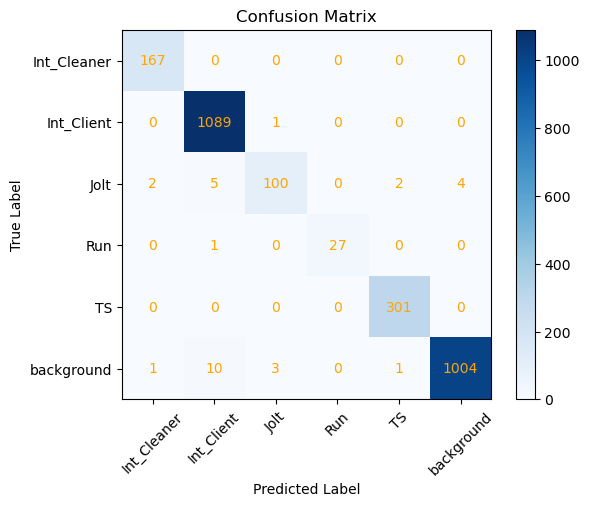

In [85]:
# Define the class labels
class_labels_new5000_featuresselection = np.sort(merged_df['Interaction'].unique())

# Create the confusion matrix
cm_new5000_featuresselection_knn = np.array(cm_new5000_featuresselection_knn)

# Create a figure and axis
fig, ax = plt.subplots()
im = ax.imshow(cm_new5000_featuresselection_knn, cmap='Blues')

# Set axis labels
ax.set_xticks(np.arange(len(class_labels_new5000_featuresselection)))
ax.set_yticks(np.arange(len(class_labels_new5000_featuresselection)))
ax.set_xticklabels(class_labels_new5000_featuresselection, rotation=45)
ax.set_yticklabels(class_labels_new5000_featuresselection)


# Add labels to each cell
for i in range(len(class_labels_new5000_featuresselection)):
    for j in range(len(class_labels_new5000_featuresselection)):
        text = ax.text(j, i, cm_new5000_featuresselection_knn[i, j], ha='center', va='center', color='orange')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set title and labels
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

# Show the plot
plt.show()

# RandomForest (Columns likelihood out) with 5k backgrounds
+ Imputer = mean

In [71]:
y_pred_new5000_featuresselection = model_new5000_featuresselection.predict(X_test_imputed_new5000_featuresselection)
accuracy_new5000_featuresselection = accuracy_score(y_test_new5000_featuresselection, y_pred_new5000_featuresselection)
print("Accuracy:", accuracy_new5000_featuresselection)

Accuracy: 0.9882266372332598


In [66]:
columns = [1,2,4,5,7,8,10,11,13,14,16,17,19,20,22,23,25,26,28,29,31,32,34,35,37,38,40,41]

In [70]:
model_new5000_featuresselection = RandomForestClassifier()
model_new5000_featuresselection.fit(X_train_imputed_new5000_featuresselection, y_train_new5000_featuresselection)

RandomForestClassifier()

In [67]:
X_new5000_featuresselection = undersampled_df.iloc[:, columns]  # Select columns 1 to 42 as features
y_new5000_featuresselection = undersampled_df.iloc[:, 0]     # Select column 0 as the target variable

In [68]:
X_train_new5000_featuresselection, X_test_new5000_featuresselection, y_train_new5000_featuresselection, y_test_new5000_featuresselection = train_test_split(X_new5000_featuresselection, y_new5000_featuresselection, test_size=0.2, random_state=1999)

In [69]:
imputer = SimpleImputer(strategy='mean')

X_train_imputed_new5000_featuresselection = imputer.fit_transform(X_train_new5000_featuresselection)
X_test_imputed_new5000_featuresselection = imputer.transform(X_test_new5000_featuresselection)

In [70]:
model_new5000_featuresselection = RandomForestClassifier()
model_new5000_featuresselection.fit(X_train_imputed_new5000_featuresselection, y_train_new5000_featuresselection)

RandomForestClassifier()

In [71]:
y_pred_new5000_featuresselection = model_new5000_featuresselection.predict(X_test_imputed_new5000_featuresselection)
accuracy_new5000_featuresselection = accuracy_score(y_test_new5000_featuresselection, y_pred_new5000_featuresselection)
print("Accuracy:", accuracy_new5000_featuresselection)

Accuracy: 0.9882266372332598


In [72]:
cv_scores = cross_val_score(model_new5000_featuresselection, X_train_imputed_new5000_featuresselection, y_train_new5000_featuresselection, cv=5)

In [73]:
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Average Accuracy:", cv_scores.mean())

Cross-Validation Accuracy Scores: [0.98850046 0.98804048 0.98666053 0.98850046 0.98712052]
Average Accuracy: 0.987764489420423


In [74]:
# Assuming you have the predicted labels (y_pred) and actual labels (y_test)
cm_new5000_featuresselection = confusion_matrix(y_test_new5000_featuresselection, y_pred_new5000_featuresselection)

#print(cm_new5000_featuresselection)

In [74]:
# Assuming you have the predicted labels (y_pred) and actual labels (y_test)
cm_new5000_featuresselection = confusion_matrix(y_test_new5000_featuresselection, y_pred_new5000_featuresselection)

#print(cm_new5000_featuresselection)

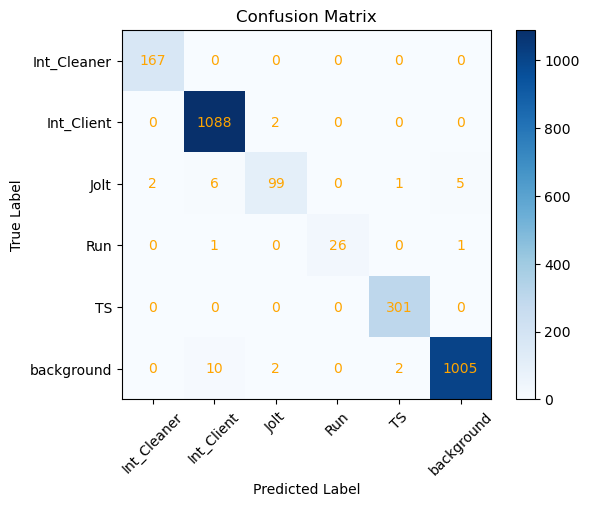

In [75]:
# Define the class labels
class_labels_new5000_featuresselection = np.sort(merged_df['Interaction'].unique())

# Create the confusion matrix
cm_new5000_featuresselection = np.array(cm_new5000_featuresselection)

# Create a figure and axis
fig, ax = plt.subplots()
im = ax.imshow(cm_new5000_featuresselection, cmap='Blues')

# Set axis labels
ax.set_xticks(np.arange(len(class_labels_new5000_featuresselection)))
ax.set_yticks(np.arange(len(class_labels_new5000_featuresselection)))
ax.set_xticklabels(class_labels_new5000_featuresselection, rotation=45)
ax.set_yticklabels(class_labels_new5000_featuresselection)


# Add labels to each cell
for i in range(len(class_labels_new5000_featuresselection)):
    for j in range(len(class_labels_new5000_featuresselection)):
        text = ax.text(j, i, cm_new5000_featuresselection[i, j], ha='center', va='center', color='orange')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set title and labels
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

# Show the plot
plt.show()

### Testing on an independent dataset

In [79]:
df_ind = pd.read_csv(r"C:\Users\raulo\Desktop\LD10(T17)NR3_re-encDLC_dlcrnetms5_LD_YelFeb10shuffle1_75000_el_filtered.csv", header = 2)
df_ind = df_ind.drop(0)
df_ind.index = df_ind.index -1    #Set the index rigth
df_ind = df_ind.drop(columns='bodyparts')

df_label_ind = pd.read_csv(r"C:\Users\raulo\Desktop\LD10(T17)NR3_re-enc_labels.csv")
df_label_ind = df_label_ind.drop(columns='Unnamed: 0')
#print(file_path)

# Convert DataFrame into a single-column DataFrame
single_column_df_ind = pd.DataFrame(df_label_ind.idxmax(axis=1), columns=['Interaction'])

C:\Users\raulo\AppData\Local\Temp\ipykernel_4620\33228674.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ind = pd.read_csv(r"C:\Users\raulo\Desktop\LD10(T17)NR3_re-encDLC_dlcrnetms5_LD_YelFeb10shuffle1_75000_el_filtered.csv", header = 2)


In [80]:
labeled_df_ind = pd.concat([single_column_df_ind, df_ind], axis=1)

In [81]:
merged_df_ind = labeled_df_ind

In [82]:
X_ind = merged_df_ind.iloc[:, 1:43]  # Select columns 1 to 42 as features
y_ind = merged_df_ind.iloc[:, 0]     # Select column 0 as the target variable

In [84]:
scaler_minmax = PowerTransformer()

X_ind_minmax = scaler_minmax.fit_transform(X_ind_imp)

In [85]:
# Prepare the dataset if needed (e.g., perform preprocessing steps)

# Make predictions using the random forest model
y_pred = model_new5000.predict(X_ind_minmax)

# If you have the ground truth labels, compare them with the predicted labels
y_true = y_ind  # Replace "target_variable" with the actual column name

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9988513830285982


In [86]:
cm = confusion_matrix(y_true, y_pred)

In [87]:
cm

array([[    0,    16],
       [   33, 42611]], dtype=int64)

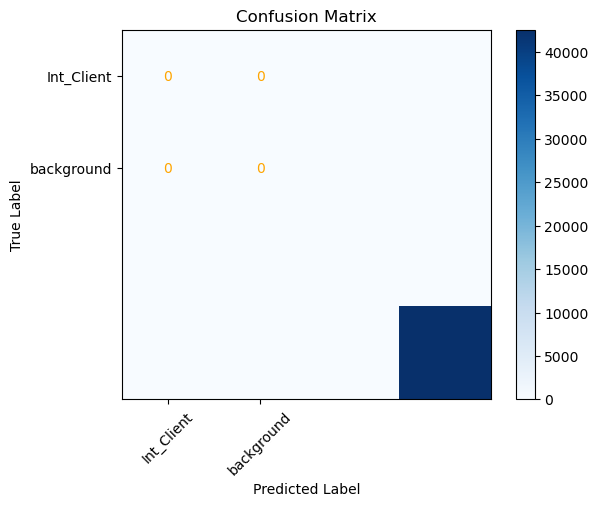

In [76]:
# Create the confusion matrix
cm = np.array(cm)

class_labels = np.sort(y_true.unique())

# Create a figure and axis
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Blues')

# Set axis labels
ax.set_xticks(np.arange(len(class_labels)))
ax.set_yticks(np.arange(len(class_labels)))
ax.set_xticklabels(class_labels, rotation=45)
ax.set_yticklabels(class_labels)

# Add labels to each cell
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        text = ax.text(j, i, cm[i, j], ha='center', va='center', color='orange')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set title and labels
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

# Show the plot
plt.show()

---
---
---
---

In [27]:
with open('saved_random_forest_model_new5000.pkl', 'wb') as file:
    pickle.dump(model_new5000, file)

In [25]:
import pickle

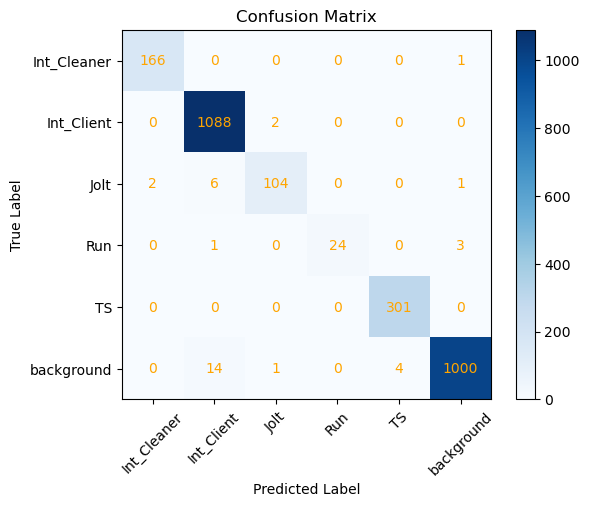

In [47]:
# Define the class labels
class_labels_new5000 = np.sort(merged_df['Interaction'].unique())

# Create the confusion matrix
cm_new5000 = np.array(cm_new5000)

# Create a figure and axis
fig, ax = plt.subplots()
im = ax.imshow(cm_new5000, cmap='Blues')

# Set axis labels
ax.set_xticks(np.arange(len(class_labels_new5000)))
ax.set_yticks(np.arange(len(class_labels_new5000)))
ax.set_xticklabels(class_labels_new5000, rotation=45)
ax.set_yticklabels(class_labels_new5000)


# Add labels to each cell
for i in range(len(class_labels_new5000)):
    for j in range(len(class_labels_new5000)):
        text = ax.text(j, i, cm_new5000[i, j], ha='center', va='center', color='orange')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set title and labels
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

# Show the plot
plt.show()

In [46]:
# Count the occurrences of each unique value
unique_values, value_counts = np.unique(y_pred_new5000, return_counts=True)

# Print the unique values and their counts
for value, count in zip(unique_values, value_counts):
    print(f"{value}: {count}")

Int_Cleaner: 168
Int_Client: 1109
Jolt: 107
Run: 24
TS: 305
background: 1005


In [45]:
# Assuming you have the predicted labels (y_pred) and actual labels (y_test)
cm_new5000 = confusion_matrix(y_test_new5000, y_pred_new5000)

#print(cm_new5000)

In [44]:
cv_scores = cross_val_score(model_new5000, X_train_new5000_minmax, y_train_new5000, cv=5)

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Average Accuracy:", cv_scores.mean())

Cross-Validation Accuracy Scores: [0.98390064 0.98298068 0.98298068 0.98666053 0.98574057]
Average Accuracy: 0.9844526218951242


In [42]:
y_pred_new5000 = model_new5000.predict(X_test_new5000_minmax)
accuracy_new5000 = accuracy_score(y_test_new5000, y_pred_new5000)
print("Accuracy:", accuracy_new5000)

Accuracy: 0.9871228844738779


In [41]:
model_new5000 = RandomForestClassifier()
model_new5000.fit(X_train_new5000_minmax, y_train_new5000)

RandomForestClassifier()

In [39]:
X_train_new5000_minmax, X_test_new5000_minmax, y_train_new5000, y_test_new5000 = train_test_split(X_new5000_minmax, y_new5000, test_size=0.2, random_state=1999)

In [38]:
scaler_minmax = MinMaxScaler()

X_new5000_minmax = scaler_minmax.fit_transform(X_new5000_imputed)

In [37]:
imputer = KNNImputer(n_neighbors=5, weights='uniform')

X_new5000_imputed = imputer.fit_transform(X_new5000)

In [36]:
X_new5000 = undersampled_df.iloc[:, 1:43]  # Select columns 1 to 42 as features
y_new5000 = undersampled_df.iloc[:, 0]     # Select column 0 as the target variable

In [27]:
interaction_counts_new = undersampled_df['Interaction'].value_counts()
print(interaction_counts_new)

Int_Client     5524
background     5000
TS             1474
Int_Cleaner     955
Jolt            490
Run             145
Name: Interaction, dtype: int64


In [26]:
undersampled_df = pd.concat([background_sample, other_df], ignore_index=True)

In [25]:
background_sample = background_df.sample(n=desired_background_samples, random_state=1999)

In [24]:
desired_background_samples = 5000

In [23]:
background_df = merged_df[merged_df['Interaction'] == 'background']
other_df = merged_df[merged_df['Interaction'] != 'background']

# RandomForest (all Columns) with 5k backgrounds

---
---
---
---

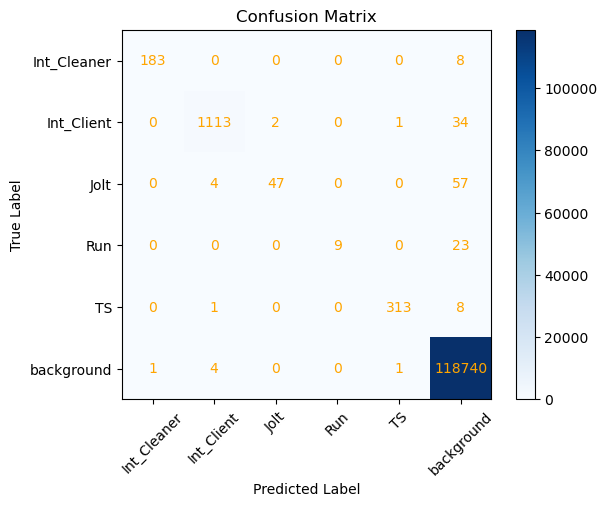

In [43]:
# Define the class labels
class_labels = np.sort(merged_df['Interaction'].unique())

# Create the confusion matrix
cm = np.array(cm)

# Create a figure and axis
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Blues')

# Set axis labels
ax.set_xticks(np.arange(len(class_labels)))
ax.set_yticks(np.arange(len(class_labels)))
ax.set_xticklabels(class_labels, rotation=45)
ax.set_yticklabels(class_labels)

# Add labels to each cell
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        text = ax.text(j, i, cm[i, j], ha='center', va='center', color='orange')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set title and labels
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

# Show the plot
plt.show()

In [42]:
# Assuming you have the predicted labels (y_pred) and actual labels (y_test)
cm = confusion_matrix(y_test, y_pred)

#print(cm)

In [41]:
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Average Accuracy:", cv_scores.mean())

Cross-Validation Accuracy Scores: [0.99850683 0.99842387 0.99850683 0.99873495 0.99854831]
Average Accuracy: 0.998544157446676


In [40]:
cv_scores = cross_val_score(model, X_train_imputed, y_train, cv=5)

In [39]:
y_pred = model.predict(X_test_imputed)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9988054649976358


In [38]:
model = RandomForestClassifier()
model.fit(X_train_imputed, y_train)

RandomForestClassifier()

In [37]:
imputer = KNNImputer(n_neighbors=5, weights='uniform')

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1999)

In [35]:
X = merged_df.iloc[:, 1:43]  # Select columns 1 to 42 as features
y = merged_df.iloc[:, 0]     # Select column 0 as the target variable

+ Imputer - KNN 5